# importing All Dependencies

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Data Collection 

In [2]:
calories_data = pd.read_csv("calories.csv")

In [3]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [4]:
calories_data.shape

(15000, 9)

In [5]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [6]:
# checking the missing values 
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

# Data Analysis 

In [7]:
# get statistical measures of about the data 
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


# Data Viualization

In [8]:
sns.set()

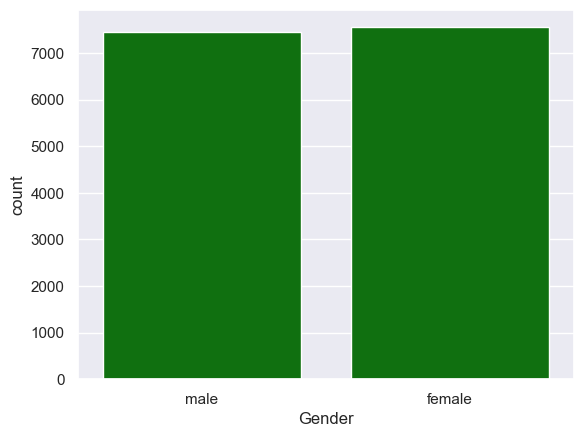

In [9]:
# plot the Gender columns 
sns.countplot(x=calories_data["Gender"], color="green")
plt.show()

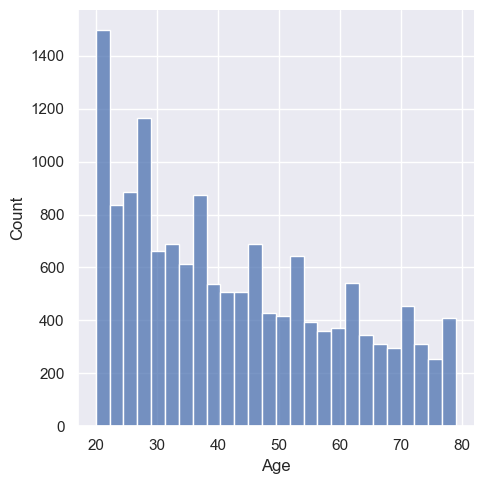

In [10]:
# Distribution of Age column
sns.displot(calories_data["Age"])
plt.show()

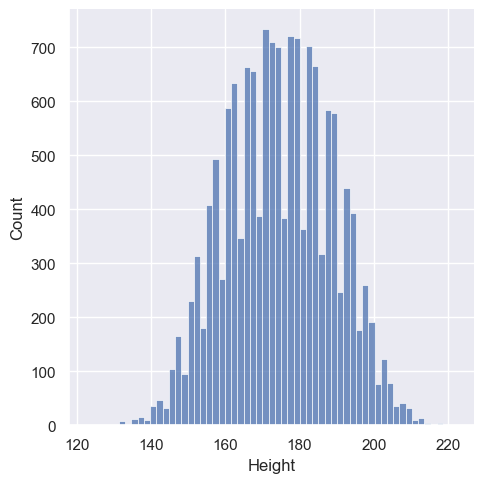

In [11]:
# Distribution of Age height
sns.displot(calories_data["Height"])
plt.show()

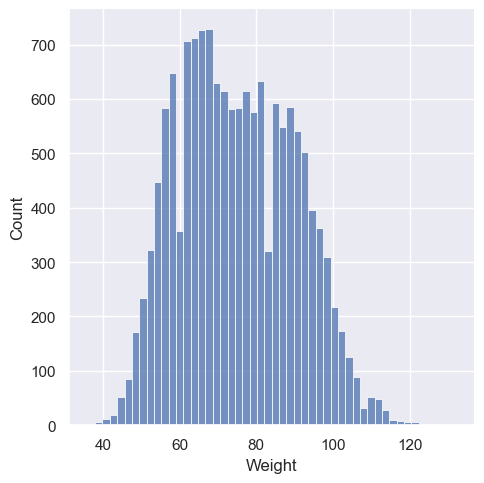

In [12]:
# Distribution of Weight column
sns.displot(calories_data["Weight"])
plt.show()

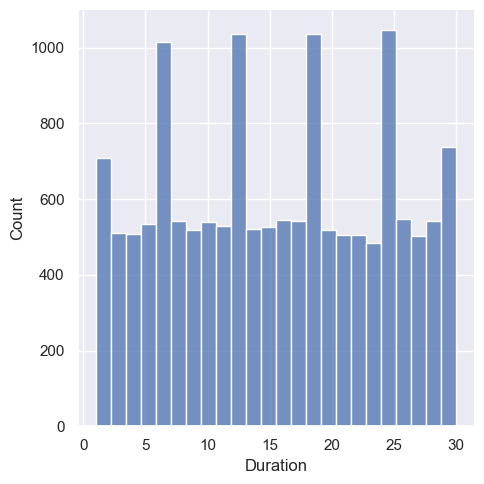

In [13]:
# Distribution of Duration column
sns.displot(calories_data["Duration"])
plt.show()

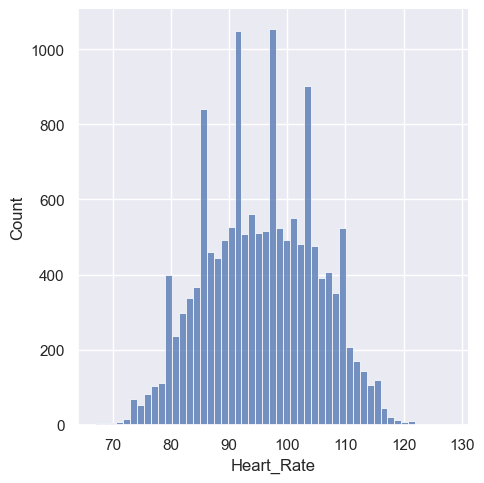

In [14]:
# Distribution of Heart rate column
sns.displot(calories_data["Heart_Rate"])
plt.show()

# Finding the Correlation 

# postive correlation --> directly relation 
# negatie correlation --> inversaly relation 

In [15]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [16]:
categorical_columns = calories_data.select_dtypes(include="object")
numerical_columns = calories_data.select_dtypes(include=("int64","float64"))

In [17]:
categorical_columns

,Gender
0,male
1,female
2,male
3,female
4,female
...,...
14995,female
14996,female
14997,female
14998,male


In [18]:
numerical_columns

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,15644082,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,78,193.0,97.0,2.0,84.0,38.3,11.0


In [19]:
calories_data.head(2)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0


In [20]:
# Initialize LabelEncoder
le = LabelEncoder()

# Encode only the "Gender" column
calories_data["Gender"] = le.fit_transform(calories_data["Gender"])

# Display the updated DataFrame
print(calories_data.head()) 

    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363       1   68   190.0    94.0      29.0       105.0       40.8   
1  14861698       0   20   166.0    60.0      14.0        94.0       40.3   
2  11179863       1   69   179.0    79.0       5.0        88.0       38.7   
3  16180408       0   34   179.0    71.0      13.0       100.0       40.5   
4  17771927       0   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0  


In [21]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


In [23]:
correlation = calories_data.corr()

In [24]:
print(correlation)

             User_ID    Gender       Age    Height    Weight  Duration  \
User_ID     1.000000 -0.000687 -0.001827 -0.013520 -0.011603 -0.002751   
Gender     -0.000687  1.000000  0.003222  0.710534  0.783186  0.003440   
Age        -0.001827  0.003222  1.000000  0.009554  0.090094  0.013247   
Height     -0.013520  0.710534  0.009554  1.000000  0.958451 -0.004625   
Weight     -0.011603  0.783186  0.090094  0.958451  1.000000 -0.001884   
Duration   -0.002751  0.003440  0.013247 -0.004625 -0.001884  1.000000   
Heart_Rate -0.000457  0.011555  0.010482  0.000528  0.004311  0.852869   
Body_Temp   0.000923  0.007264  0.013175  0.001200  0.004095  0.903167   
Calories   -0.001661  0.022357  0.154395  0.017537  0.035481  0.955421   

            Heart_Rate  Body_Temp  Calories  
User_ID      -0.000457   0.000923 -0.001661  
Gender        0.011555   0.007264  0.022357  
Age           0.010482   0.013175  0.154395  
Height        0.000528   0.001200  0.017537  
Weight        0.004311   0.00

In [29]:
print(calories_data.head())  # Show first few rows
print(calories_data.dtypes)  # Check data types

    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363       1   68   190.0    94.0      29.0       105.0       40.8   
1  14861698       0   20   166.0    60.0      14.0        94.0       40.3   
2  11179863       1   69   179.0    79.0       5.0        88.0       38.7   
3  16180408       0   34   179.0    71.0      13.0       100.0       40.5   
4  17771927       0   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0  
User_ID         int64
Gender          int64
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object


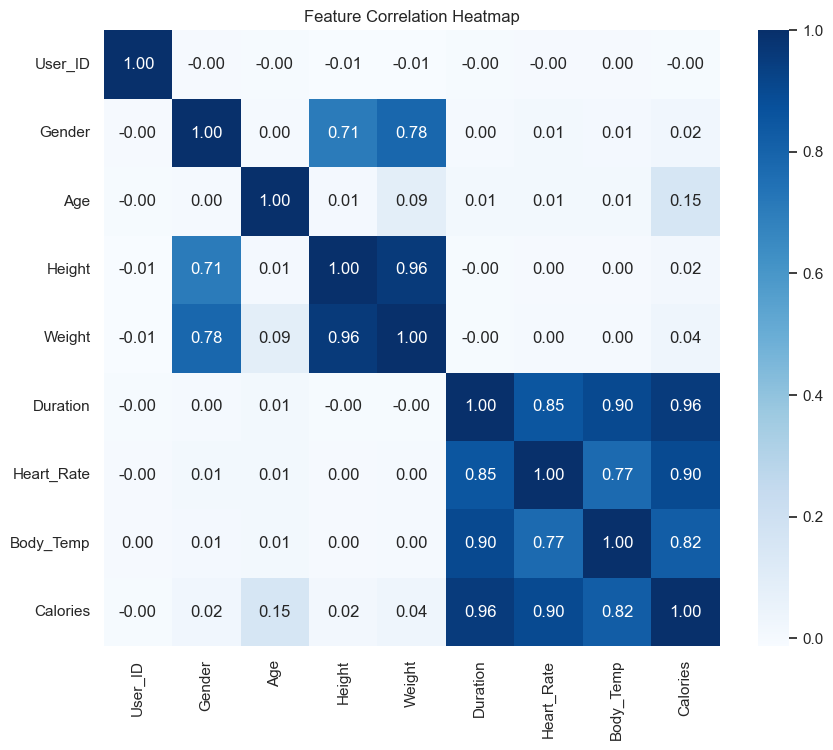

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="Blues", fmt=".2f", cbar=True, square=True)
plt.title("Feature Correlation Heatmap")
plt.show()


# Separating the Features & Label 

In [31]:
x = calories_data.drop(columns=["User_ID", "Calories"], axis=1)
y= calories_data["Calories"]

In [32]:
x

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,1,68,190.0,94.0,29.0,105.0,40.8
1,0,20,166.0,60.0,14.0,94.0,40.3
2,1,69,179.0,79.0,5.0,88.0,38.7
3,0,34,179.0,71.0,13.0,100.0,40.5
4,0,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...
14995,0,20,193.0,86.0,11.0,92.0,40.4
14996,0,27,165.0,65.0,6.0,85.0,39.2
14997,0,43,159.0,58.0,16.0,90.0,40.1
14998,1,78,193.0,97.0,2.0,84.0,38.3


In [33]:
y

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

In [49]:
calories_data.tail()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
14995,15644082,0,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,0,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,0,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,1,78,193.0,97.0,2.0,84.0,38.3,11.0
14999,11751526,1,63,173.0,79.0,18.0,92.0,40.5,98.0


# Train Test Split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [35]:
print(x.shape, x_train.shape, x_test.shape)

(15000, 7) (12000, 7) (3000, 7)


# Model Training 

In [36]:
xgb_model = XGBRegressor()

In [37]:
xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Prediction

In [44]:
test_data_prediction = xgb_model.predict(x_test)

In [45]:
print(test_data_prediction)

[172.07645  195.7858    51.708874 ... 121.50776   19.239851 214.43597 ]


# predictive system 

In [51]:
input_data = (0,27,165.0,65.0,6.0,85.0,39.2)
# chaging to numpy array 
input_data_as_numpy_array = np.asarray(input_data)
# reshape the array 
input_data_reshape = input_data_as_numpy_array.reshape(1, -1) 
# prediction 
prediction = xgb_model.predict(input_data_reshape)
# display value  
print("Insurance Cost : ", prediction)

Insurance Cost :  [22.947247]


In [46]:
# checking accuracy and overfitting 
print(xgb_model.score(x_train, y_train)*100, xgb_model.score(x_test, y_test)*100)

99.95777219604747 99.88678909361674


# Save Model 

In [40]:
import joblib
filename = "XGB_reg Calories Burnt Predition.pkl"
# save model 
joblib.dump(xgb_model, filename)

['XGB_reg Calories Burnt Predition.pkl']

In [41]:
# Load model
loaded_model = joblib.load(filename)
# prediction 
prediction = loaded_model.predict(x_test)

In [43]:
prediction

array([172.07645 , 195.7858  ,  51.708874, ..., 121.50776 ,  19.239851,
       214.43597 ], shape=(3000,), dtype=float32)